In [42]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [4]:
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [46]:
iris_feature = "花萼长度","花萼宽度","花萼长度","花瓣宽度"
path = "datas/iris.data"  # 数据文件路径
# 读取数据
data = pd.read_csv(path,header=None)
# 获取数据中的特征列
x_prime = data[list(range(4))]
# 对标注列数据进行编码
y = pd.Categorical(data[4]).codes

特征：  花萼长度 +  花萼宽度
	预测正确数目： 127
	准确率：84.67%
特征：  花萼长度 +  花萼长度
	预测正确数目： 148
	准确率：98.67%
特征：  花萼长度 +  花瓣宽度
	预测正确数目： 146
	准确率：97.33%
特征：  花萼宽度 +  花萼长度
	预测正确数目： 146
	准确率：97.33%
特征：  花萼宽度 +  花瓣宽度
	预测正确数目： 145
	准确率：96.67%
特征：  花萼长度 +  花瓣宽度
	预测正确数目： 149
	准确率：99.33%


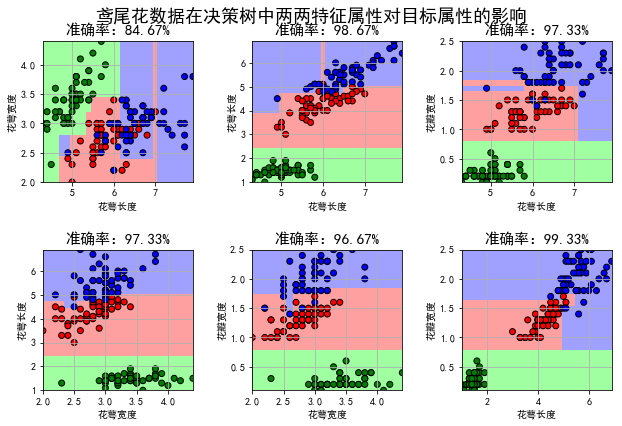

In [57]:
# 进行特征比较
feature_pairs = [[0,1],
                 [0,2],
                 [0,3],
                 [1,2],
                 [1,3],
                 [2,3]]
plt.figure(figsize=(9,6),facecolor="w")
for i,pair in enumerate(feature_pairs):
# 获取数据
    x = x_prime[pair]
# 决策树学习
    clf = DecisionTreeClassifier(criterion="gini",max_depth=5)
    clf.fit(x,y)
    
    y_hat = clf.predict(x)
    score = clf.score(x,y)
    y2 = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)  # 统计预测正确的个数
    print("特征： ",iris_feature[pair[0]], '+ ',iris_feature[pair[1]])
    print("\t预测正确数目：",c)
    print("\t准确率：%.2f%%" % (score*100))
    
    N,M = 500,500   # 纵横个各采样多少值
    x1_min,x2_min = x.min()
    x1_max,x2_max = x.max()
    t1 = np.linspace(x1_min,x1_max,N)
    t2 = np.linspace(x2_min,x2_max,M)
    
    x1,x2 = np.meshgrid(t1,t2)  # 生成网格
    x_test = np.dstack((x1.flat,x2.flat))[0] # 测试点
    
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(list("grb"))
    # 模型预测测试点类别
    y_hat = clf.predict(x_test)
    y_hat = y_hat.reshape(x1.shape)
    plt.subplot(2,3,i+1)
    plt.pcolormesh(x1,x2,y_hat,cmap=cm_light)
    plt.scatter(x[pair[0]],x[pair[1]],c=y,edgecolors="k",cmap=cm_dark)  # 样本
    
    plt.xlabel(iris_feature[pair[0]],fontsize=10)
    plt.ylabel(iris_feature[pair[1]],fontsize=10)
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.grid()
    plt.title("准确率：%.2f%%" % (score*100),fontdict = {"fontsize":15})
    
plt.suptitle('鸢尾花数据在决策树中两两特征属性对目标属性的影响', fontsize=18, y = 1)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show() 

In [41]:
x = x_prime[[0,1]]
x.min()

0    4.3
1    2.0
dtype: float64

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)